In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, simplify, lambdify, Float, Eq, solve

In [5]:
def ajuste_minimos_quadrados(x_vals, y_vals, grau=1):
    """
    Aplica o método dos mínimos quadrados para ajuste de curvas.

    Parâmetros:
    x_vals -- Lista de coordenadas x dos pontos
    y_vals -- Lista de coordenadas y dos pontos
    grau   -- Grau do polinômio de ajuste (padrão é 1 - ajuste linear)

    Retorna:
    Polinômio ajustado, valores ajustados e função simbólica
    """
    x = symbols('x')
    n = len(x_vals)

    A = []
    for i in range(grau + 1):
        linha = [sum(xi**(i + j) for xi in x_vals) for j in range(grau + 1)]
        A.append(linha)

    B = [sum(y_vals[k] * x_vals[k]**i for k in range(n)) for i in range(grau + 1)]

    a = sp.symbols(f'a0:{grau+1}')
    sistema = [Eq(sum(A[i][j]*a[j] for j in range(grau + 1)), B[i]) for i in range(grau + 1)]
    solucao = solve(sistema, a)

    coeficientes = [Float(solucao[a[i]].evalf(), 4) for i in range(grau + 1)]
    polinomio = sum(coeficientes[i] * x**i for i in range(grau + 1))

    f_ajuste = lambdify(x, polinomio, 'numpy')
    tabela = [(round(xi, 4), round(f_ajuste(xi), 4)) for xi in x_vals]

    return polinomio, tabela, f_ajuste

Ajuste de Curvas - Mínimos Quadrados



Polinômio ajustado (mínimos quadrados):
2.908⋅x + 56.63

Tabela de valores ajustados:
x = 0.0000, y = 56.6300
x = 1.0000, y = 59.5380
x = 2.0000, y = 62.4460
x = 3.0000, y = 65.3540
x = 4.0000, y = 68.2620
x = 5.0000, y = 71.1700
x = 6.0000, y = 74.0780
x = 7.0000, y = 76.9860


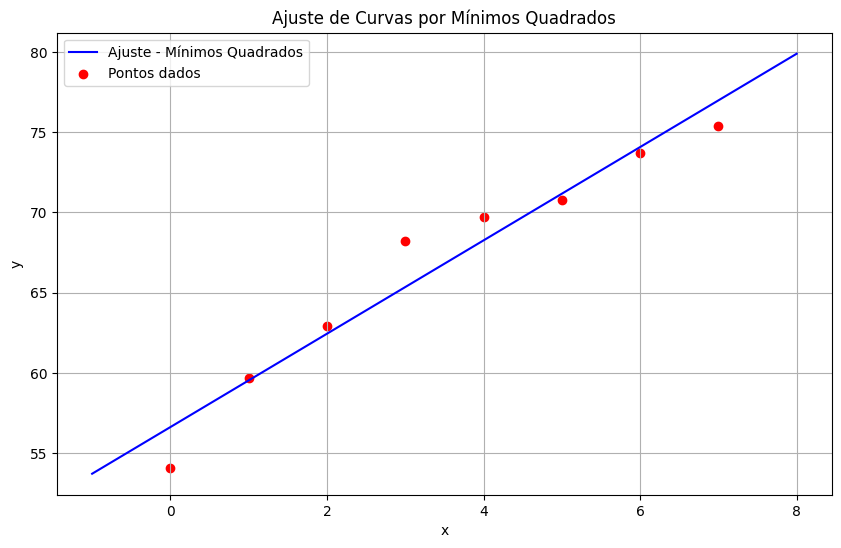

In [ ]:
# Leitura dos dados
print("Ajuste de Curvas - Mínimos Quadrados")
n = int(input("Digite o número de pontos: "))
x_vals = []
y_vals = []
for i in range(n):
    x = float(input(f"x{i}: "))
    y = float(input(f"y{i}: "))
    x_vals.append(x)
    y_vals.append(y)

grau = int(input("Digite o grau do polinômio de ajuste: "))
polinomio, tabela, f_ajuste = ajuste_minimos_quadrados(x_vals, y_vals, grau)

# Exibe o polinômio ajustado
print("\nPolinômio ajustado (grau {}):".format(grau))
print(sp.pretty(polinomio, use_unicode=True))

# Exibe a tabela de pontos
print("\nTabela de pontos:")
print(tabulate(tabela, headers=["x", "y ajustado"], tablefmt="grid"))

# Estimativa de valor y para um x dado
x_estimado = float(input("\nDigite um valor de x para estimar y: "))
y_estimado = f_ajuste(x_estimado)
print(f"y({x_estimado}) ≈ {y_estimado:.4f}")

# Gráfico
x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
y_plot = f_ajuste(x_plot)

plt.plot(x_plot, y_plot, label=f'Ajuste grau {grau}')
plt.scatter(x_vals, y_vals, color='red', label='Pontos dados')
plt.title('Ajuste de Curvas - Mínimos Quadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()